In [1]:
import aquire
import prepare

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = aquire.get_titanic_train()
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = aquire.get_titanic_test()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print("The shape of the train data is (row, column):"+ str(train_data.shape))
print(train_data.info())
print('-' * 40)
print("The shape of the test data is (row, column):"+ str(test_data.shape))
print(test_data.info())

The shape of the train data is (row, column):(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
----------------------------------------
The shape of the test data is (row, column):(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            33

In [5]:
total_missing = train_data.isnull().sum().sort_values(ascending = False)
percent = round(train_data.isnull().sum().sort_values(ascending = False)/len(train_data)*100, 2)
pd.concat([total_missing, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [6]:
total_missing = test_data.isnull().sum().sort_values(ascending = False)
percent = round(test_data.isnull().sum().sort_values(ascending = False)/len(test_data)*100, 2)
pd.concat([total_missing, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


### Missing Embarked Info

In [7]:
train_data[train_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


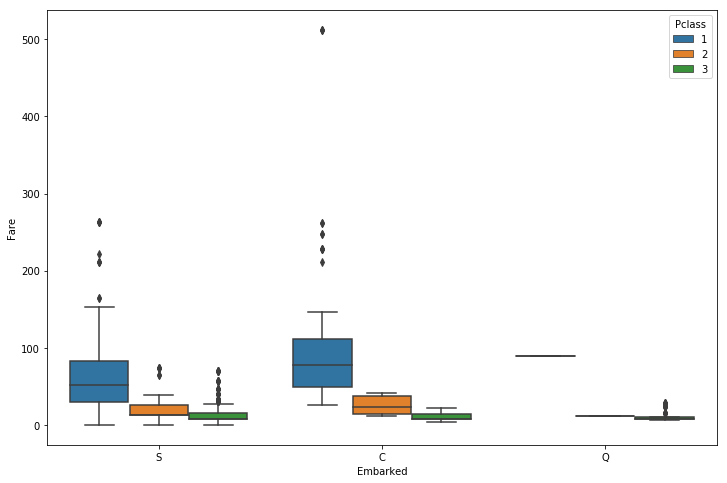

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train_data)

The average price for a ticket that embarked from Cherbourg was 80.00; chaning the empty Embarked values to 'C' as the price for both tickets was 80.00 

In [9]:
train_data.Embarked.fillna('C', inplace=True)

### Missing Cabin Info

In [10]:
print("Train Cabin missing: " + str(train_data.Cabin.isnull().sum()/len(train_data.Cabin)))
print("Test Cabin missing: " + str(test_data.Cabin.isnull().sum()/len(test_data.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [11]:
titanic_data = pd.concat([train_data,test_data], ignore_index=False)
titanic_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [12]:
titanic_data.Cabin.fillna("O", inplace=True)
titanic_data.Cabin = [i[0] for i in titanic_data.Cabin]

In [13]:
titanic_data.groupby("Cabin")['Fare'].mean().sort_values(ascending=True)

Cabin
G     14.205000
F     18.079367
O     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [14]:
def cabin_missing(i):
    j = 0
    if i < 16:
        j = "G"
    elif i >= 16 and i < 27:
        j = "F"
    elif i >= 27 and i < 38:
        j = "T"
    elif i >= 38 and i < 47:
        j = "A"
    elif i >= 47 and i < 53:
        j = "E"
    elif i >= 53 and i < 54:
        j = "D"
    elif i >= 54 and i < 116:
        j = 'C'
    else:
        j = "B"
    return j

In [15]:
titanic_data['Cabin'] = titanic_data.Fare.apply(lambda x: cabin_missing(x))

In [16]:
titanic_data.sort_values(by = 'PassengerId', inplace=True)

In [17]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [18]:
train_data = titanic_data[:891]
test_data = titanic_data[891:]

In [19]:
total_missing = train_data.isnull().sum().sort_values(ascending = False)
percent = round(train_data.isnull().sum().sort_values(ascending = False)/len(train_data)*100, 2)
pd.concat([total_missing, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Age,177,19.87
Ticket,0,0.00
Survived,0,0.00
SibSp,0,0.00
Sex,0,0.00
Pclass,0,0.00
PassengerId,0,0.00
Parch,0,0.00
Name,0,0.00
Fare,0,0.00


In [20]:
total_missing = test_data.isnull().sum().sort_values(ascending = False)
percent = round(test_data.isnull().sum().sort_values(ascending = False)/len(test_data)*100, 2)
pd.concat([total_missing, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Survived,418,100.00
Age,86,20.57
Fare,1,0.24
Ticket,0,0.00
SibSp,0,0.00
Sex,0,0.00
Pclass,0,0.00
PassengerId,0,0.00
Parch,0,0.00
Name,0,0.00


### Missing Fare Info

In [21]:
test_data[test_data.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,B,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [22]:
missing_value = test_data[(test_data.Pclass == 3) & (test_data.Embarked == "S") & (test_data.Sex == "male")].Fare.mean()
test_data = test_data.Fare.fillna(missing_value, inplace=True)

In [23]:
train_data = prepare.prep_titanic_data(aquire.get_titanic_train())

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,D,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,2


In [25]:
train_data.Fare.isnull().sum()

0